# TODO

In [9]:
import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.append('..')
from ehd_dataset import EHD_Loader

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Dataset_Pkl = "C:/Dropbox/SPEED/Self Driving EHD/Datasets/compiled_data.pickle"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
loader = EHD_Loader(Dataset_Pkl)

In [23]:
DATASETS = ('23-May-2022_squares',          # 0
            "8-Aug-2022_lg-square-20um",    # 1
            "10-Sep-2022_std-square-10um",  # 2
            "10-Sep-2022_std-square-20um",  # 3
            "13-Sep-2022_std-square-30um",  # 4
            "13-Sep-2022_std-square-40um",  # 5
            "27-Feb-23_sf-sin-line-20um")   # 6
DATASET = DATASETS[6]
idx = loader.names.index(DATASET)
df = loader.datasets[idx].copy()
df = df.loc[df.clogging == False]
df['absolute volts'] = df.vector.apply(lambda x: np.abs(x[0]))
df['printed'] = df.area.apply(lambda x: x > 0)
df['width [s]'] = df.vector.apply(lambda x: x[-1])
df['width [ms]'] = df['width [s]'].apply(lambda x: x*1e3)
df['frequency [Hz]'] = df.vector.apply(lambda x: x[-1])   # for line-type prints

# df.head()

In [24]:
prints = df[df.area > 0].copy()
prints.sort_values(by='area', inplace=True)
prints.head()

,obj_count,area,print_length,max_width,mean_width,clogging,wave,vector,volts,jetted,...,Standoff [um],Wavegen,V Thresh [V] @ .5s,W thresh [s] @ 1.5 Vt,dataset_name,absolute volts,printed,width [s],width [ms],frequency [Hz]
4139,1,10084.860276,251.647014,12.095829,8.665308,False,"[207.07091622, 207.73072404, 208.39052619, 209...","[414.1418320805408, 180.0]",630.0,True,...,20.0,sin_line,111.3,0.021,27-Feb-23_sf-sin-line-20um,414.141832,True,180.0,180000.0,180.0
4295,1,12009.860117,195.698925,19.354839,13.269526,False,"[233.50813159500004, 234.25217908500002, 234.9...","[467.0162627157049, 743.0]",645.0,True,...,20.0,sin_line,111.3,0.021,27-Feb-23_sf-sin-line-20um,467.016263,True,743.0,743000.0,743.0
4209,1,17121.804138,268.817204,17.204301,13.772043,False,"[231.87609454500003, 232.61494204500005, 233.3...","[463.752189068427, 669.0]",645.0,True,...,20.0,sin_line,111.3,0.021,27-Feb-23_sf-sin-line-20um,463.752189,True,669.0,669000.0,669.0
4225,1,21217.776021,262.365559,21.505372,17.486341,False,"[230.29778793000003, 231.03160572000004, 231.7...","[460.5955757181621, 407.0]",645.0,True,...,20.0,sin_line,111.3,0.021,27-Feb-23_sf-sin-line-20um,460.595576,True,407.0,407000.0,407.0
4294,1,24105.275782,247.311828,27.956989,21.075269,False,"[234.55866954, 235.30606393500003, 236.0534518...","[469.117338448186, 555.0]",645.0,True,...,20.0,sin_line,111.3,0.021,27-Feb-23_sf-sin-line-20um,469.117338,True,555.0,555000.0,555.0


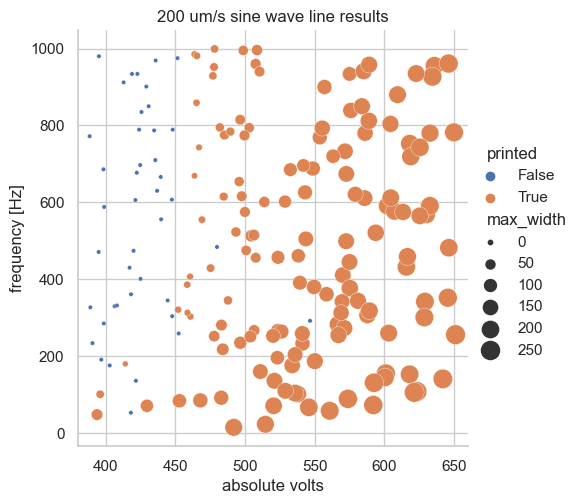

In [25]:
import seaborn as sns


sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=df,
    x="absolute volts", y="frequency [Hz]",  # "sidth [ms]" "frequency [Hz]"
    hue="printed", size="max_width",
    sizes=(10, 200),
)
plt.xlim((380, 660))
plt.title('200 um/s sine wave line results')
plt.savefig('phase plot.png', dpi=1000, bbox_inches='tight', facecolor='w')